# Table of Contents
 <p><div class="lev1"><a href="#Hello-NetworkX-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hello NetworkX</a></div><div class="lev2"><a href="#Nodes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Nodes</a></div><div class="lev2"><a href="#Edges-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Edges</a></div><div class="lev2"><a href="#What-to-Use-as-Nodes-and-Edges-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>What to Use as Nodes and Edges</a></div><div class="lev2"><a href="#Accessing-Edges-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Accessing Edges</a></div><div class="lev2"><a href="#Adding-attributes-to-graphs,-nodes,-and-edges-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Adding attributes to graphs, nodes, and edges</a></div><div class="lev2"><a href="#Directed-Graphs-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Directed Graphs</a></div><div class="lev2"><a href="#Multigraphs-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Multigraphs</a></div><div class="lev2"><a href="#Graph-generators-and-graph-operations-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Graph generators and graph operations</a></div><div class="lev2"><a href="#Analyzing-graphs-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Analyzing graphs</a></div><div class="lev2"><a href="#Drawing-graphs-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Drawing graphs</a></div><div class="lev1"><a href="#Let's-Play-with-NetworkX!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's Play with NetworkX!</a></div><div class="lev2"><a href="#Dijkstra法-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dijkstra法</a></div>

# Hello NetworkX

[本家のチュートリアル](http://networkx.readthedocs.io/en/networkx-1.11/tutorial/)を参考にNetworkXと戯れてみる。

In [14]:
import networkx as nx
G = nx.Graph() #無向グラフG

In [3]:
nx.__version__

'1.11'

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats.

## Nodes

In [15]:
G.add_node(1)

In [16]:
G.add_nodes_from([2,3])

In [17]:
H = nx.path_graph(10)

In [18]:
H.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
G.nodes()

[1, 2, 3]

In [20]:
G.add_nodes_from(H)

In [21]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
G1 = nx.Graph()

In [24]:
G1.add_node(H) #The graph G now contains H as a node. 

In [25]:
G1.nodes()

## Edges

In [26]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # unpack edge tuple*

In [27]:
G.edges()

[(1, 2), (2, 3)]

In [29]:
# Another way to add edges
G.add_edges_from([(1,2),(2,3)])

In [30]:
G.add_edges_from(H.edges())

In [31]:
G.edges()

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [32]:
H.edges()

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [34]:
G.remove_node(2)

In [35]:
G.nodes()

[0, 1, 3, 4, 5, 6, 7, 8, 9]

In [36]:
G.remove_nodes_from([1,3,4])

In [37]:
G.nodes()

[0, 5, 6, 7, 8, 9]

In [45]:
G.clear()

In [46]:
G.nodes()

[]

In [47]:
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [48]:
G.nodes()

['s', 'a', 'm', 'spam', 'p']

In [49]:
G.number_of_nodes()

5

In [50]:
G.number_of_edges()

0

In [54]:
G.add_edges_from([('s','m'),('s','p')])

In [55]:
G.edges()

[('s', 'p'), ('s', 'm')]

In [57]:
G.neighbors('s')

['p', 'm']

In [58]:
G.nodes()

['s', 'a', 'm', 'spam', 'p']

In [59]:
G.edges()

[('s', 'p'), ('s', 'm')]

In [60]:
H = nx.DiGraph(G) #Gを元に有効グラフを生成

In [61]:
H.nodes()

['p', 's', 'm', 'spam', 'a']

In [63]:
H.edges() #無向グラフの一辺は、有向グラフでは二辺を用いて表現されている

[('p', 's'), ('s', 'm'), ('s', 'p'), ('m', 's')]

In [64]:
edgelist = [(0,1),(1,2),(2,3)]
H1 = nx.Graph(edgelist)

In [65]:
H1.edges()

[(0, 1), (1, 2), (2, 3)]

In [66]:
H1.nodes()

[0, 1, 2, 3]

## What to Use as Nodes and Edges

You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1,n2,object=x).

## Accessing Edges

In addition to the methods Graph.nodes(), Graph.edges(), and Graph.neighbors(), iterator versions (e.g. Graph.edges_iter()) can save you from creating large lists when you are just going to iterate through them anyway.

Fast direct access to the graph data structure is also possible using subscript notation.

In [69]:
G = nx.Graph()
G.add_edges_from(([1,2],[1,3],[2,4]))

In [70]:
G.nodes()

[1, 2, 3, 4]

In [71]:
G.edges()

[(1, 2), (1, 3), (2, 4)]

In [72]:
G[1]

{2: {}, 3: {}}

In [73]:
G[1][2]

{}

In [74]:
G[1][2]['color']='blue'

In [75]:
G[1][2]

{'color': 'blue'}

In [76]:
G[1][2]['color']

'blue'

Fast examination of all edges is achieved using adjacency iterators. Note that for undirected graphs this actually looks at each edge twice.

In [94]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

In [99]:
for n, nbrs in FG.adjacency_iter():
    #n:nodes, nbrs:neighbors
    #print('the current node is ' + str(n))
    #print('its neighbors are ' + str(nbrs))
    for nbr, eattr in nbrs.items():
        #eattr: edge's attributes
        #print(nbr)
        #print(eattr)
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges method.

In [101]:
#なんか実行結果がおかしいけど原因わからず
for (u,v,d) in FG.edges(data='weight'):
    if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))

(4, 3, 0.125)
(4, 3, 0.375)


## Adding attributes to graphs, nodes, and edges

In [102]:
#graph attribute
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [103]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [104]:
#node attribute
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')

In [105]:
G.node[1]

{'time': '5pm'}

In [107]:
G.node[1]['room'] = 714

In [108]:
G.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

In [110]:
#edge attribute
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])

In [111]:
G[1][2]['weight']

4.7

In [112]:
G[1][2]['weight'] = 4
G[1][2]['weight']

4

## Directed Graphs

The *DiGraph* class provides additional methods specific to directed edges, e.g. *DiGraph.out_edges(), DiGraph.in_degree(), DiGraph.predecessors(), DiGraph.successors()* etc.

In [113]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [114]:
DG.out_degree(1)

1

In [115]:
DG[1][2]['weight']

0.5

In [116]:
DG.successors(1)

[2]

In [117]:
DG.neighbors(1)

[2]

In [120]:
DG.predecessors(1)

[3]

In [123]:
# convert G to undirected graph
H = nx.Graph(DG)

In [124]:
H.edges()

[(1, 2), (1, 3)]

## Multigraphs

Allow multiple edges between any pair of nodes.

NB: many algorithms are not well defined on such graphs. Shortest path is one example.

## Graph generators and graph operations

## Analyzing graphs

The structure of G can be analyzed using various graph-theoretic functions such as:

In [126]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1,3)])
G.add_node('spam')

In [130]:
for i in nx.connected_components(G):
    print (i)

{1, 2, 3}
{'spam'}


In [131]:
sorted(nx.degree(G).values())

[0, 1, 1, 2]

In [132]:
nx.clustering(G)

{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}

In [133]:
nx.degree(G)

{1: 2, 2: 1, 3: 1, 'spam': 0}

In [134]:
nx.degree(G,1)

2

In [136]:
G.degree(1)

2

In [137]:
G.degree([1,2])

{1: 2, 2: 1}

In [138]:
sorted(G.degree([1,2]).values())

[1, 2]

## Drawing graphs

In [142]:
import matplotlib.pyplot as plt

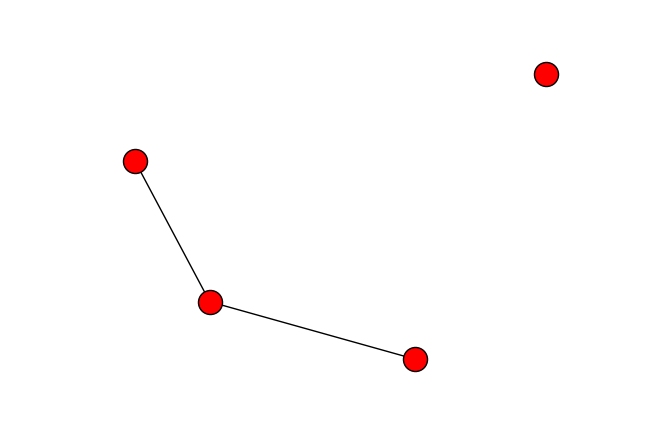

In [143]:
nx.draw(G)
plt.show()

# Let's Play with NetworkX!

https://showa-yojyo.github.io/notebook/python-networkx/index.html
ここを参考に、いくつかのグラフアルゴリズムをNetworkXを用いて実装してみる（予定）

## Dijkstra法

In [144]:
import networkx as nx
import matplotlib.pyplot as plt

In [145]:
from networkx.algorithms.shortest_paths.weighted import all_pairs_dijkstra_path_length

<img  src="apgl-findall.png"/>

In [146]:
# Make a graph.
G = nx.DiGraph()

# Define edges with weights.
G.add_weighted_edges_from(
    ((0, 1, 10.0),
     (0, 2, 14.0),
     (0, 3, 12.0),
     (1, 2, 8.0),
     (1, 4, 19.0),
     (2, 3, 7.0),
     (2, 5, 22.0),
     (3, 5, 21.0),
     (4, 5, 11.0),))

# Compute the shortest path lengths between all nodes in graph G.
all_pairs = all_pairs_dijkstra_path_length(G)
for source, mapping in all_pairs.items():
    for target in mapping.keys():
        if source != target:
            dist = mapping[target]
            print("({}, {}): {:4.1f}".format(source, target, dist))

(0, 1): 10.0
(0, 2): 14.0
(0, 3): 12.0
(0, 4): 29.0
(0, 5): 33.0
(1, 2):  8.0
(1, 3): 15.0
(1, 4): 19.0
(1, 5): 30.0
(2, 3):  7.0
(2, 5): 22.0
(3, 5): 21.0
(4, 5): 11.0


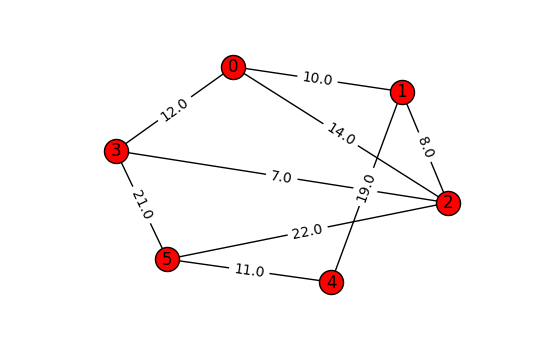

In [151]:
import networkx as nx
import matplotlib.pyplot as plt

# Make a graph.
G = nx.Graph()

# Define edges with weights.
G.add_weighted_edges_from(
    ((0, 1, 10.0),
     (0, 2, 14.0),
     (0, 3, 12.0),
     (1, 2, 8.0),
     (1, 4, 19.0),
     (2, 3, 7.0),
     (2, 5, 22.0),
     (3, 5, 21.0),
     (4, 5, 11.0),))

# Position nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(G, k=5.)

# Draw labels for nodes and edges.
nx.draw_networkx_labels(G, pos)

# Draw only weight attribute as edge label.
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Finish drawing.
nx.draw(G, pos)

# Display with Matplotlib.
plt.axis('off')
plt.show()